<a href="https://colab.research.google.com/github/forminju/DACON_anomaly_detection_/blob/main/0217_1___smartfactory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Base & visualization
import pandas as pd
import random
import os
import numpy as np
import warnings
import matplotlib.pylab as plt
import seaborn as sns

#sklearn module & utils
from tqdm.notebook import tqdm
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold , KFold, train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectPercentile
warnings.filterwarnings('ignore') 

#Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding
import category_encoders as ce

#Sampling
from imblearn.over_sampling import BorderlineSMOTE

#Modeling
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [5]:
%cd /content/drive/MyDrive/스마트공장

/content/drive/MyDrive/스마트공장


# SEED 고정

In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [7]:
#Seed 고정
class CFG:
    SEED = 26

# Data Load

In [8]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [9]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class','Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

## Data Pre-processing

In [10]:
X_group = train_x.loc[:,'X_1':]

# 결측치 처리

In [11]:
train_x.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1, inplace=True)
test_x.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1,inplace=True)

In [12]:
X_group = train_x.loc[:,'X_1':]

In [13]:
X_group_pc = pd.DataFrame(X_group.isnull().sum() / len(X_group))

In [14]:
X_group.isnull().sum() / len(X_group) 

X_1       0.416388
X_2       0.416388
X_5       0.416388
X_7       0.416388
X_8       0.416388
            ...   
X_2870    0.832776
X_2872    1.000000
X_2873    1.000000
X_2874    1.000000
X_2875    1.000000
Length: 2509, dtype: float64

# 결측치 비율이 0.7 이상인 경우 drop

In [15]:
train_x.drop(X_group_pc[X_group_pc[0] > 0.7].index, axis=1,inplace=True)

In [16]:
test_x.drop(X_group_pc[X_group_pc[0] > 0.7].index, axis=1,inplace=True)

In [22]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0,2
1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0,3
2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.0,115.365517,104.0,193.4,179.820690,165.5,383.0,367.320755,353.0,2
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.2,112.082759,94.5,190.3,181.920690,165.8,384.0,369.188679,353.0,3
4,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5,2,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
594,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0,2
595,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0,2
596,4,1,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


# Imputation 기법 적용

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

imputer_output = imputer.fit_transform(train_x)

In [24]:
train_x = pd.DataFrame(imputer_output, columns=train_x.columns, index=list(train_x.index.values));train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,139.600000,131.646667,115.400000,209.000000,197.286667,189.000000,383.000000,368.296296,353.000000,2.0
1,3.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,145.500000,128.748276,119.700000,198.000000,193.296552,185.600000,383.000000,367.735849,353.000000,3.0
2,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,128.000000,115.365517,104.000000,193.400000,179.820690,165.500000,383.000000,367.320755,353.000000,2.0
3,3.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,126.200000,112.082759,94.500000,190.300000,181.920690,165.800000,384.000000,369.188679,353.000000,3.0
4,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,152.100000,138.066667,109.700000,208.600000,196.393333,182.600000,383.000000,367.351852,352.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5.0,2.0,2.000000,95.000000,10.00000,50.000000,10.000000,52.000000,468.900000,473.900000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,7.0
594,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,185.100000,159.527586,144.200000,198.300000,180.810345,168.700000,384.000000,369.811321,353.000000,2.0
595,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,187.600000,178.248276,159.600000,186.500000,176.486207,156.600000,383.000000,367.018868,352.000000,2.0
596,4.0,1.0,40.000000,94.000000,11.00000,45.000000,10.000000,31.000000,505.800000,510.900000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,4.0


In [25]:
imputer_output_test = imputer.transform(test_x)

In [26]:
test_x = pd.DataFrame(imputer_output_test, columns=test_x.columns, index=list(test_x.index.values));test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,5.0,2.0,2.000000,94.000000,10.00000,51.000000,10.000000,52.000000,469.600000,474.400000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,7.0
1,4.0,2.0,2.000000,93.000000,11.00000,45.000000,10.000000,31.000000,506.600000,511.100000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,5.0
2,4.0,2.0,2.000000,95.000000,11.00000,45.000000,10.000000,31.000000,506.600000,511.400000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,5.0
3,0.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,201.300000,179.739286,149.900000,198.000000,191.450000,183.800000,467.000000,444.192308,423.000000,0.0
4,1.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,227.900000,190.664286,162.400000,210.200000,193.082143,179.700000,465.000000,443.211539,423.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5.0,2.0,2.000000,91.000000,10.00000,51.000000,10.000000,52.000000,502.500000,511.900000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,7.0
306,4.0,2.0,2.000000,96.000000,11.00000,45.000000,10.000000,31.000000,513.700000,518.900000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,5.0
307,5.0,2.0,2.000000,91.000000,10.00000,50.000000,10.000000,52.000000,502.800000,511.600000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,7.0
308,5.0,2.0,2.000000,95.000000,10.00000,51.000000,10.000000,52.000000,503.200000,512.600000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,7.0


In [27]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,139.600000,131.646667,115.400000,209.000000,197.286667,189.000000,383.000000,368.296296,353.000000,2.0
1,3.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,145.500000,128.748276,119.700000,198.000000,193.296552,185.600000,383.000000,367.735849,353.000000,3.0
2,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,128.000000,115.365517,104.000000,193.400000,179.820690,165.500000,383.000000,367.320755,353.000000,2.0
3,3.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,126.200000,112.082759,94.500000,190.300000,181.920690,165.800000,384.000000,369.188679,353.000000,3.0
4,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,152.100000,138.066667,109.700000,208.600000,196.393333,182.600000,383.000000,367.351852,352.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5.0,2.0,2.000000,95.000000,10.00000,50.000000,10.000000,52.000000,468.900000,473.900000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,7.0
594,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,185.100000,159.527586,144.200000,198.300000,180.810345,168.700000,384.000000,369.811321,353.000000,2.0
595,2.0,0.0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,187.600000,178.248276,159.600000,186.500000,176.486207,156.600000,383.000000,367.018868,352.000000,2.0
596,4.0,1.0,40.000000,94.000000,11.00000,45.000000,10.000000,31.000000,505.800000,510.900000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,4.0


In [ ]:
train_x.T

,0,1,2,3,4,5,6,7,8,9,...,588,589,590,591,592,593,594,595,596,597
LINE,T050304,T050307,T050304,T050307,T050304,T050307,T050304,T050307,T050304,T050307,...,T100306,T100306,T100306,T100306,T100304,T100306,T050304,T050304,T100304,T100306
PRODUCT_CODE,A_31,A_31,A_31,A_31,A_31,A_31,A_31,A_31,A_31,A_31,...,T_31,T_31,T_31,T_31,T_31,T_31,A_31,A_31,O_31,O_31
X_1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,40.0,21.0
X_2,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,...,89.0,94.0,89.0,87.0,98.0,95.0,95.0,95.0,94.0,87.0
X_5,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2861,197.286667,193.296552,179.82069,181.92069,196.393333,190.310345,188.18,184.724138,182.296667,180.29,...,171.437931,171.437931,171.437931,171.437931,171.437931,171.437931,180.810345,176.486207,171.437931,171.437931
X_2862,189.0,185.6,165.5,165.8,182.6,184.7,176.9,173.8,173.8,167.2,...,166.6,166.6,166.6,166.6,166.6,166.6,168.7,156.6,166.6,166.6
X_2863,383.0,383.0,383.0,384.0,383.0,384.0,384.0,393.0,393.0,393.0,...,384.0,384.0,384.0,384.0,384.0,384.0,384.0,383.0,384.0,384.0
X_2864,368.296296,367.735849,367.320755,369.188679,367.351852,368.622641,368.425926,370.283019,373.5,372.87037,...,367.0,367.0,367.0,367.0,367.0,367.0,369.811321,367.018868,367.0,367.0


# 파생변수 생성

In [19]:
train_x['LINE_PRODUCT'] = train_x['LINE'].str.cat(train_x['PRODUCT_CODE'])

In [20]:
test_x['LINE_PRODUCT'] = test_x['LINE'].str.cat(test_x['PRODUCT_CODE'])

In [21]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE', 'LINE_PRODUCT']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


# 상관계수 확인

In [32]:
X_group_train = train_x.iloc[:,2:1194]
X_group_test = test_x.iloc[:,2:1194]
#test_x.iloc[:,2:1848]

In [34]:
train_y

0      1
1      2
2      1
3      2
4      1
      ..
593    1
594    0
595    0
596    1
597    1
Name: Y_Class, Length: 598, dtype: int64

In [36]:
X_group_train['Y_Class'] = train_y; X_group_train

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Y_Class
0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,0.005731,...,139.600000,131.646667,115.400000,209.000000,197.286667,189.000000,383.000000,368.296296,353.000000,1
1,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,0.005731,...,145.500000,128.748276,119.700000,198.000000,193.296552,185.600000,383.000000,367.735849,353.000000,2
2,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,0.005731,...,128.000000,115.365517,104.000000,193.400000,179.820690,165.500000,383.000000,367.320755,353.000000,1
3,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,0.005731,...,126.200000,112.082759,94.500000,190.300000,181.920690,165.800000,384.000000,369.188679,353.000000,2
4,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,0.005731,...,152.100000,138.066667,109.700000,208.600000,196.393333,182.600000,383.000000,367.351852,352.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.000000,95.000000,10.00000,50.000000,10.000000,52.000000,468.900000,473.900000,459.200000,0.000000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,1
594,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,0.005731,...,185.100000,159.527586,144.200000,198.300000,180.810345,168.700000,384.000000,369.811321,353.000000,0
595,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,0.005731,...,187.600000,178.248276,159.600000,186.500000,176.486207,156.600000,383.000000,367.018868,352.000000,0
596,40.000000,94.000000,11.00000,45.000000,10.000000,31.000000,505.800000,510.900000,497.100000,0.000000,...,174.799197,160.715924,146.128514,184.131325,174.172638,163.290763,423.558233,406.088187,388.064257,1


In [37]:
corr = X_group_train.corr(method='pearson'); corr

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Y_Class
X_1,1.000000e+00,-9.092047e-03,7.960686e-02,-2.426446e-02,-1.801135e-02,-5.285519e-02,-2.049311e-02,-2.698990e-02,-1.249571e-02,-3.731139e-03,...,1.307868e-16,1.859757e-16,7.421414e-17,-3.502294e-16,-3.788013e-16,3.001706e-16,1.998005e-16,-1.257764e-16,4.531019e-16,0.004189
X_2,-9.092047e-03,1.000000e+00,5.695303e-01,-5.979492e-01,-1.950169e-01,-7.019721e-01,3.339305e-01,3.126567e-01,3.934744e-01,-9.309295e-02,...,-4.558974e-15,-3.366439e-15,-3.050228e-15,-1.423190e-15,-6.281173e-16,1.748660e-15,1.704457e-15,2.317402e-15,1.575743e-15,-0.052453
X_5,7.960686e-02,5.695303e-01,1.000000e+00,-6.998414e-01,-1.819063e-01,-8.015820e-01,3.477617e-01,3.169359e-01,4.211802e-01,-4.309260e-02,...,-1.697230e-15,-6.571332e-16,-7.734886e-16,-1.835182e-15,-2.956591e-15,-8.896855e-16,9.949044e-16,2.244162e-15,9.705713e-16,-0.052164
X_7,-2.426446e-02,-5.979492e-01,-6.998414e-01,1.000000e+00,3.241536e-01,8.730752e-01,-4.686509e-01,-4.443374e-01,-5.331435e-01,2.697380e-02,...,5.093176e-16,3.025312e-16,2.251856e-16,7.479927e-16,3.335491e-16,7.001254e-16,-5.172324e-16,-8.610457e-16,3.630513e-17,0.030883
X_8,-1.801135e-02,-1.950169e-01,-1.819063e-01,3.241536e-01,1.000000e+00,2.269341e-01,-1.059023e-01,-1.039872e-01,-1.105209e-01,-1.213014e-02,...,-1.636402e-15,9.722489e-17,2.504885e-16,-1.280097e-15,-3.062065e-15,8.126968e-16,4.660511e-15,5.139225e-15,4.560405e-15,0.050523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2862,3.001706e-16,1.748660e-15,-8.896855e-16,7.001254e-16,8.126968e-16,5.945836e-16,-1.881872e-15,-2.253731e-15,-1.081664e-15,6.213997e-17,...,-1.020100e-01,-1.246614e-01,-1.332523e-01,8.000708e-01,9.226148e-01,1.000000e+00,-2.127853e-01,-2.178233e-01,-2.107418e-01,0.034352
X_2863,1.998005e-16,1.704457e-15,9.949044e-16,-5.172324e-16,4.660511e-15,7.043635e-18,1.565026e-15,1.621873e-16,-1.348472e-15,-4.578063e-17,...,7.779727e-01,8.472478e-01,8.736016e-01,-1.691697e-01,-1.879062e-01,-2.127853e-01,1.000000e+00,9.982655e-01,9.938264e-01,0.111559
X_2864,-1.257764e-16,2.317402e-15,2.244162e-15,-8.610457e-16,5.139225e-15,-4.769842e-16,2.816558e-15,1.325316e-15,-1.502553e-16,2.617278e-16,...,7.756231e-01,8.446917e-01,8.709497e-01,-1.711259e-01,-1.918826e-01,-2.178233e-01,9.982655e-01,1.000000e+00,9.970829e-01,0.110829
X_2865,4.531019e-16,1.575743e-15,9.705713e-16,3.630513e-17,4.560405e-15,6.610095e-16,-1.508256e-16,-1.691102e-15,-3.342750e-15,4.524996e-16,...,7.710302e-01,8.401414e-01,8.668630e-01,-1.693375e-01,-1.866645e-01,-2.107418e-01,9.938264e-01,9.970829e-01,1.000000e+00,0.110252


In [48]:
y_corr = corr[1192:]; y_corr

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Y_Class
Y_Class,0.004189,-0.052453,-0.052164,0.030883,0.050523,0.038815,0.026851,0.026502,0.019971,-0.000831,...,0.015185,0.029743,0.044609,0.038953,0.062281,0.034352,0.111559,0.110829,0.110252,1.0


In [53]:
corr_y = y_corr.T; corr_y

,Y_Class
X_1,0.004189
X_2,-0.052453
X_5,-0.052164
X_7,0.030883
X_8,0.050523
...,...
X_2862,0.034352
X_2863,0.111559
X_2864,0.110829
X_2865,0.110252


In [56]:
corr_y = corr_y.abs(); corr_y.describe()

,Y_Class
count,1193.000000
mean,0.065984
std,0.057909
min,0.000031
25%,0.020673
50%,0.046275
75%,0.112794
max,1.000000


In [67]:
corr_y = corr_y[corr_y>0.112794].dropna(axis=0); corr_y

,X_23,X_25,X_73,X_90,X_120,X_121,X_480,X_551,X_910,X_941,...,X_1697,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2855,X_2856,Y_Class
Y_Class,0.117969,0.117969,0.149214,0.14008,0.152842,0.148359,0.112799,0.112799,0.112799,0.113074,...,0.141784,0.121985,0.122136,0.121864,0.154937,0.177548,0.172886,0.122285,0.14645,1.0


In [80]:
use_columns = corr_y.columns[:298]

In [81]:
use_columns

Index(['X_23', 'X_25', 'X_73', 'X_90', 'X_120', 'X_121', 'X_480', 'X_551',
       'X_910', 'X_941',
       ...
       'X_1696', 'X_1697', 'X_2845', 'X_2846', 'X_2847', 'X_2848', 'X_2849',
       'X_2850', 'X_2855', 'X_2856'],
      dtype='object', length=298)

In [83]:
train_x = train_x[use_columns] 
test_x = test_x[use_columns] 

# standardScaler

In [ ]:
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, IncrementalPCA
from sklearn.decomposition import TruncatedSVD

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
#train data 변환
X_group_train = scaler.fit_transform(train_x)

#test data 변환
X_group_test = scaler.transform(test_x)

In [87]:
X_group_train = pd.DataFrame(X_group_train)
X_group_test = pd.DataFrame(X_group_test)

## LGBMClassifier

In [91]:
LGBM = LGBMClassifier(random_state=42).fit(X_group_train, train_y)

In [92]:
preds = LGBM.predict(X_group_test)
print('Done.')

Done.


# INFERENCE

In [94]:
submit = pd.read_csv('sample_submission.csv')

In [95]:
submit['Y_Class'] = preds

In [96]:
submit.to_csv('0217preds_1.csv', index=False)

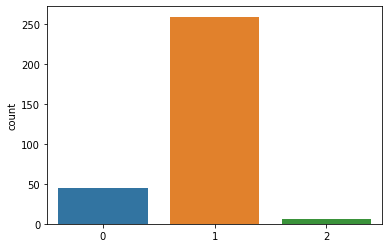

In [93]:
sns.countplot(preds)

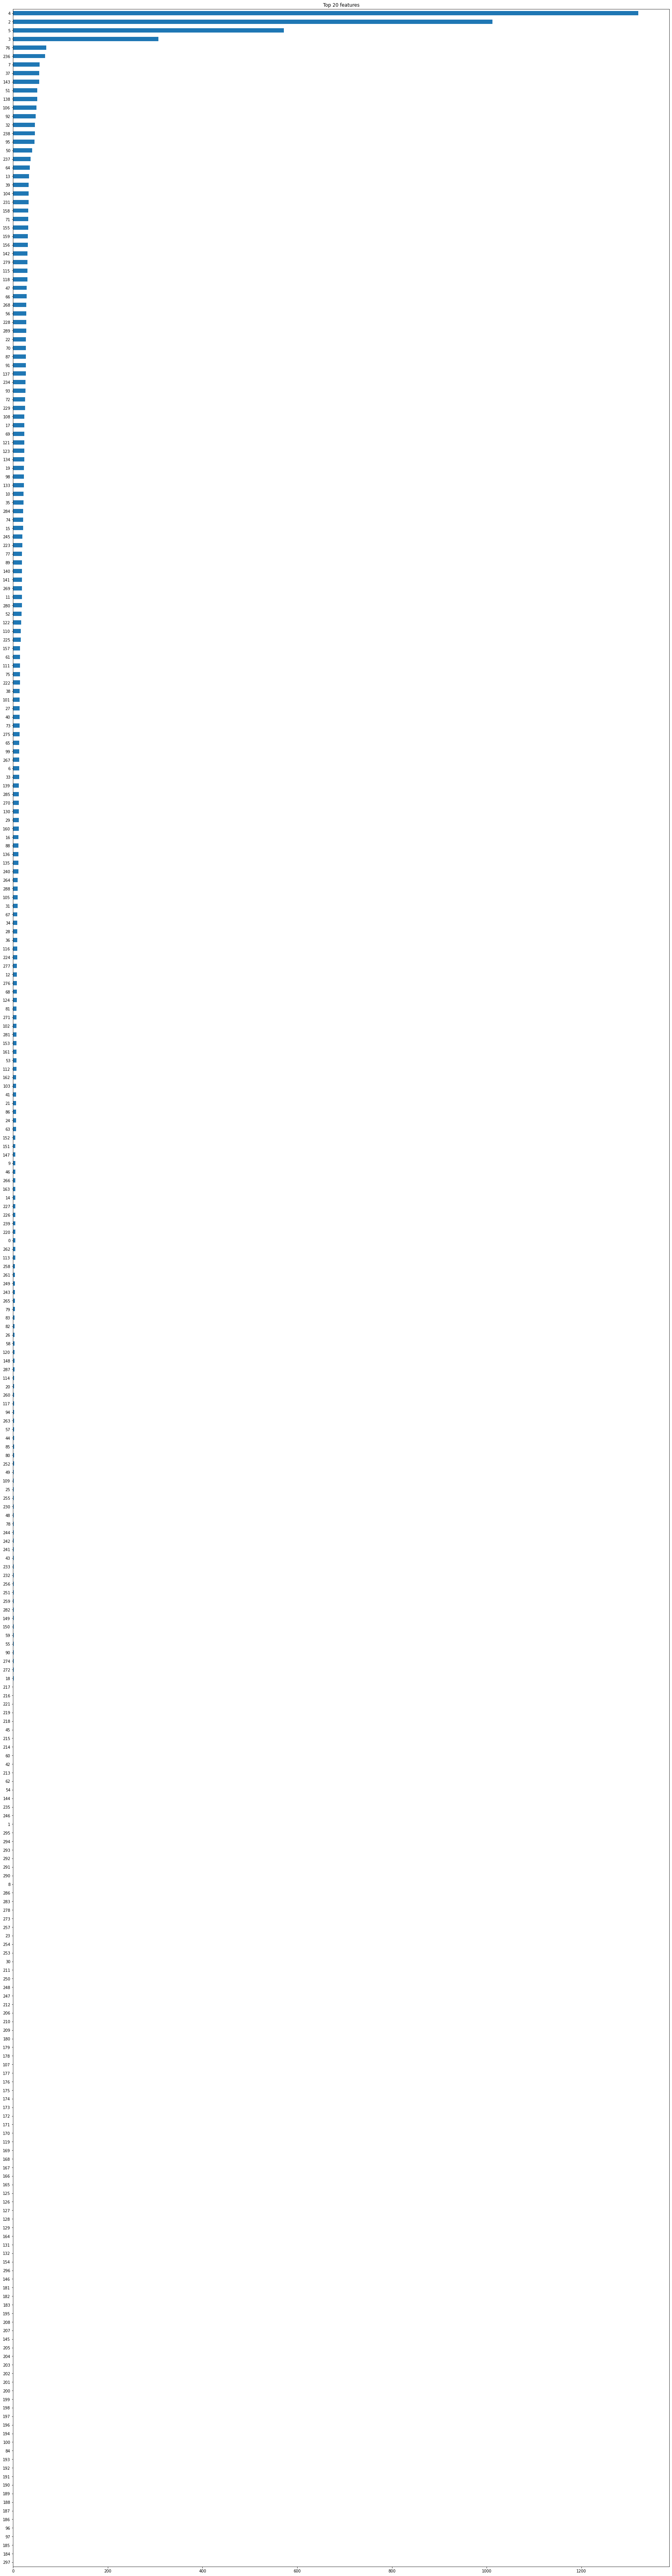

In [103]:
LGBM.feature_importances_

importances = pd.Series(LGBM.feature_importances_, X_group_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=20
plt.figure(figsize=(30,120))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

In [107]:
pd.DataFrame(importances.sort_values(ascending=False))

,0
4,1320
2,1012
5,572
3,307
76,70
...,...
218,0
217,0
216,0
215,0


In [98]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.0 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b34b98bc8433433dd6441ae39b362607052b66e522af3c92c86ca6f82ef0b118
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib